In [1]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from math import sin, cos, sqrt, fabs

@jit(nopython=True)
def Clifford(x, y, a, b, c, d, *o):
    return sin(a * y) + c * cos(a * x), \
           sin(b * x) + d * cos(b * y)


In [2]:
n=10000000

@jit(nopython=True)
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y

def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))

In [3]:
%%time
df = trajectory(Clifford, 0, 0, -1.3, -1.3, -1.8, -1.9)

CPU times: user 1.06 s, sys: 270 ms, total: 1.33 s
Wall time: 1.36 s


In [4]:
df.tail()

x         y
9999995  1.857884  1.395837
9999996  0.375264 -0.205512
9999997 -1.326024 -2.301316
9999998  0.423711  2.867012
9999999 -0.981134  1.060115

In [5]:
%%time

cvs = ds.Canvas(plot_width = 700, plot_height = 700)
agg = cvs.points(df, 'x', 'y')
print(agg.values[190:195,190:195],"\n")

[[ 37  41  26  24  24]
 [ 28  30  42  27  26]
 [111  53  29  37  28]
 [145 177 113  63  44]
 [ 78  94 136 140  96]] 

CPU times: user 634 ms, sys: 7.22 ms, total: 642 ms
Wall time: 648 ms


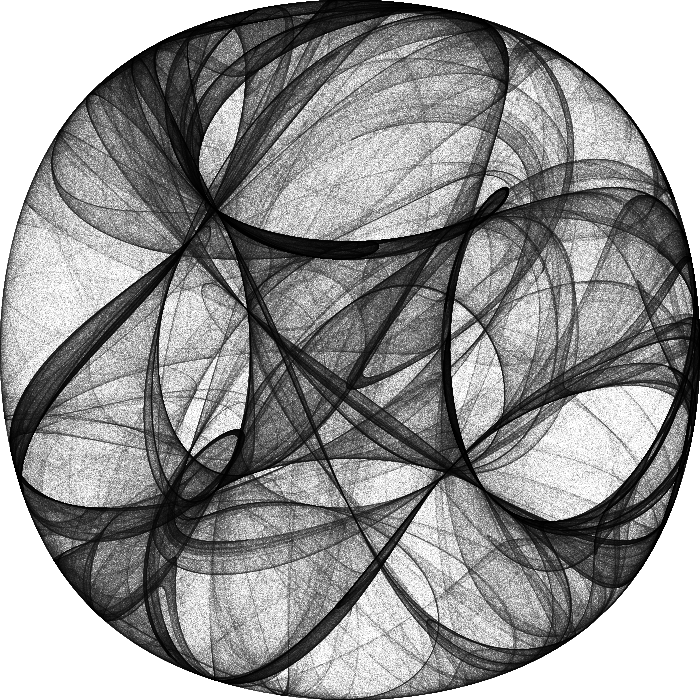

In [6]:
ds.transfer_functions.Image.border=0

tf.shade(agg, cmap = ["white", "black"])

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([1, 3, 2]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'sample figure'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


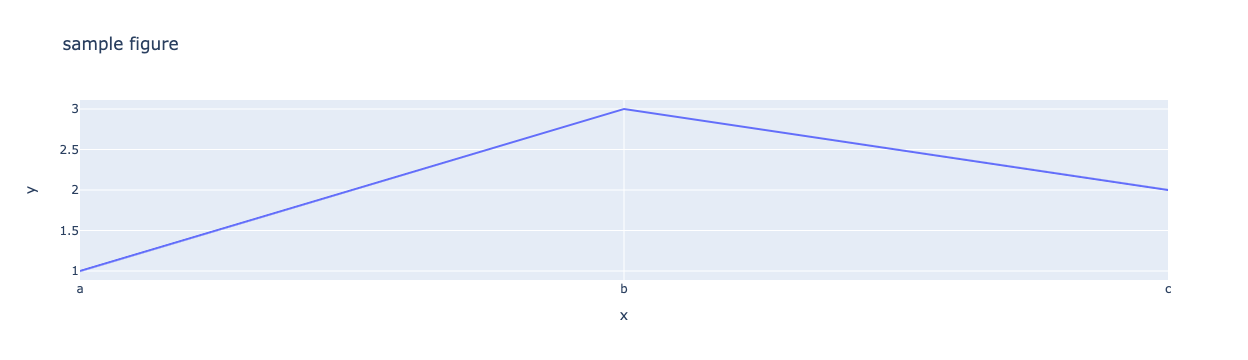

In [7]:
import plotly.express as px

fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
print(fig)
fig.show()

In [8]:
import json

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

fig = px.line(
    x=["a","b","c"], y=[1,3,2], 
    title="sample figure", height=325
)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph", figure=fig),
    html.Pre(
        id='structure',
        style={
            'border': 'thin lightgrey solid', 
            'overflowY': 'scroll',
            'height': '275px'
        }
    )
])

@app.callback(
    Output("structure", "children"), 
    [Input("graph", "figure")])
def display_structure(fig_json):
    return json.dumps(fig_json, indent=2)

app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'